In [1]:
# Import the relevant dependencies for web scraping, Pandas, and Matplotlib.
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars Temperature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Scrape the data in the HTML table using Pandas - OR - Splinter & Beautiful Soup
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
browser.quit()

In [7]:
# Examine the data types of all the DataFrame columns
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
# cast (or convert) the data to the appropriate datetime, int, or float data types.
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [9]:
# How many months exist on Mars?
count = 0
months = []

for i in range(0, len(mars_df['month'])):
    if mars_df['month'][i] not in months:
        months.append(mars_df['month'][i])
        count += 1
print("Number of months on Mars: ", count)

Number of months on Mars:  12


In [10]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
count = 0
sols = []

for i in range(0, len(mars_df['sol'])):
    if mars_df['sol'][i] not in sols:
        sols.append(mars_df['sol'][i])
        count += 1
print("Number of Maritan days data was collected: ", count)

Number of Maritan days data was collected:  1867


    martian_month  average_low
0               1        -77.0
1               2        -80.0
2               3        -83.0
3               4        -83.0
4               5        -79.0
5               6        -75.0
6               7        -72.0
7               8        -68.0
8               9        -69.0
9              10        -72.0
10             11        -72.0
11             12        -74.0
The lowest average temperatures are in months 3 and 4. The warmest is in month 8.


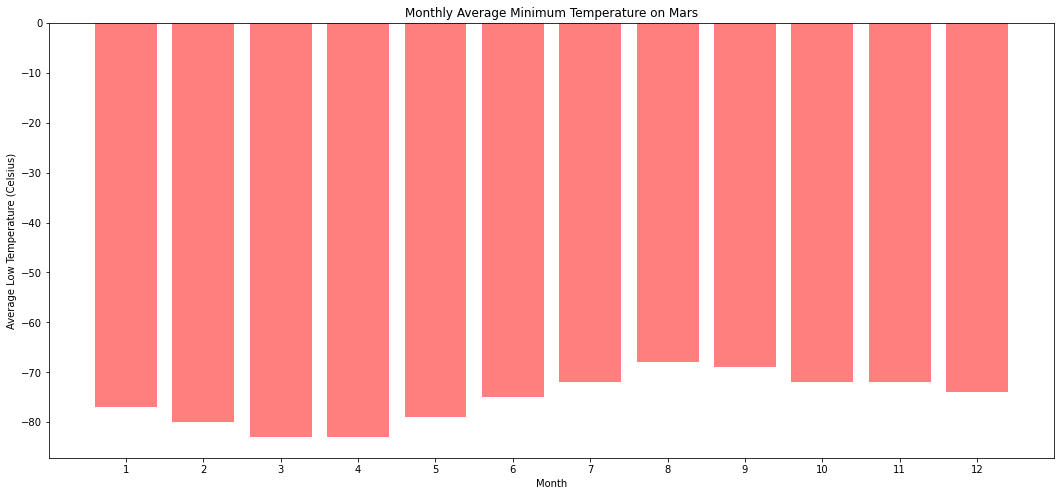

In [51]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Get the answer by averaging the minimum daily temperature of all the months.
average_low=[]

for i in range(1,13):
    weather_per_month={"martian_month":"","average_low":""}
    avg_min_temp_month=mars_df.loc[mars_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["martian_month"] = i
    weather_per_month["average_low"] = round_avg_min_temp_month
    average_low.append(weather_per_month)    

# Plot the results as a bar chart.
avg_low_df = pd.DataFrame(average_low)
print(avg_low_df)
x_axis = avg_low_df['martian_month']
y_axis = avg_low_df['average_low']
plt.figure(figsize=(18,8)) 
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xlabel("Month")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, avg_low_df['martian_month'])
plt.ylabel("Average Low Temperature (Celsius)")
plt.title("Monthly Average Minimum Temperature on Mars")
print("The lowest average temperatures are in months 3 and 4. The warmest is in month 8.")

    martian_month  average_lowpress
0               1             862.0
1               2             889.0
2               3             877.0
3               4             806.0
4               5             749.0
5               6             745.0
6               7             795.0
7               8             874.0
8               9             913.0
9              10             887.0
10             11             857.0
11             12             842.0
The lowest average pressure is in month 6. The highest is in month 9.


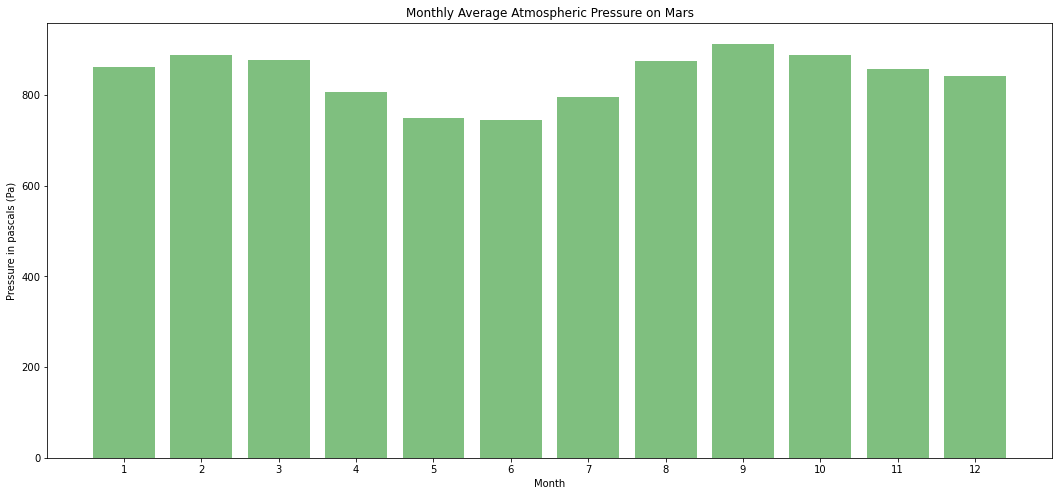

In [59]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
average_lowpress=[]

for i in range(1,13):
    press_per_month={"martian_month":"","average_lowpress":""}
    avg_min_press_month=mars_df.loc[mars_df['month']==i]['pressure'].mean()
    round_avg_min_press_month = round(avg_min_press_month,0)
    press_per_month["martian_month"] = i
    press_per_month["average_lowpress"] = round_avg_min_press_month
    average_lowpress.append(press_per_month)    

# Plot the results as a bar chart.
avg_lowpress_df = pd.DataFrame(average_lowpress)
print(avg_lowpress_df)
x_axis2 = avg_lowpress_df['martian_month']
y_axis2 = avg_lowpress_df['average_lowpress']
plt.figure(figsize=(18,8)) 
plt.bar(x_axis2, y_axis2, color='g', alpha=0.5, align="center")
plt.xlabel("Month")
tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, avg_lowpress_df['martian_month'])
plt.ylabel("Pressure in pascals (Pa)")
plt.title("Monthly Average Atmospheric Pressure on Mars")
print("The lowest average pressure is in month 6. The highest is in month 9.")

Text(0.5, 1.0, 'Daily Minimum Temperature')

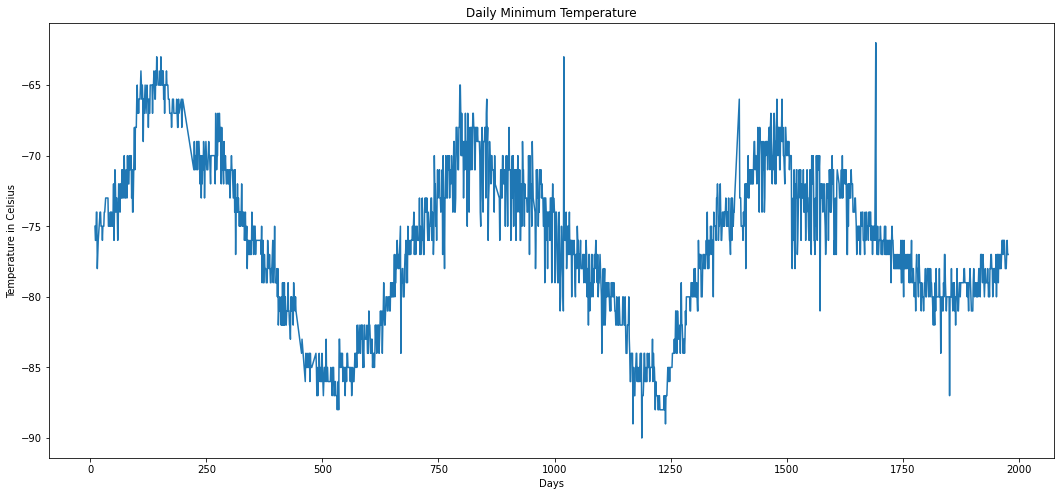

In [58]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.
plt.figure(figsize=(18,8)) 
plt.plot(mars_df['sol'],mars_df['min_temp'])
plt.xlabel("Days")
plt.ylabel("Temperature in Celsius")
plt.title('Daily Minimum Temperature')

In [ ]:
# Export the DataFrame to a CSV file.
mars_df.to_csv('./mars_weather_data.csv', index=False)